For the first part of this question we can take a look at the areas where price is higher than other parts of city. We can look through zipcode and also look through the neighbourhood. <br>
For the second part we can try to find a correlation between property type and price. <br>
Let's have a loook at the data.

In [5]:
# import libraries

# for computation

import numpy as np
import pandas as pd

# for visualization

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [18]:
# reading the dataset
# For consistancy we will use the data for both the cities at similar time (Jan 2020)

boston_listing = pd.read_csv('./data/Boston_listings_jan2020.csv')
seattle_listing = pd.read_csv('./data/Seattle_listings_jan2020.csv')

In [19]:
# Look at the data

print (boston_listing.shape)
print (seattle_listing.shape)

(3746, 106)
(7869, 106)


In [20]:
print (boston_listing.columns)
print (seattle_listing.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
     

In [21]:
boston_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20200105171901,2020-01-05,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,f,f,super_strict_30,f,f,1,1,0,0,0.29
1,8789,https://www.airbnb.com/rooms/8789,20200105171901,2020-01-05,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,...,f,f,strict_14_with_grace_period,f,f,10,10,0,0,0.36
2,10730,https://www.airbnb.com/rooms/10730,20200105171901,2020-01-05,Bright 1bed facing Golden Dome,"Bright, spacious unit, new galley kitchen, new...",Bright one bed facing the golden dome of the S...,"Bright, spacious unit, new galley kitchen, new...",none,Beacon Hill is located downtown and is conveni...,...,f,f,strict_14_with_grace_period,f,f,10,10,0,0,0.25
3,10811,https://www.airbnb.com/rooms/10811,20200105171901,2020-01-05,"Back Bay Apt Studio-3 blocks to Pru center & ""T""",Stunning Back Bay furnished studio apartment. ...,"Back Bay Studio Apt - Private bath, A/C, Cabl...",Stunning Back Bay furnished studio apartment. ...,none,A one-square mile neighborhood that is arguabl...,...,f,f,strict_14_with_grace_period,f,f,6,6,0,0,0.19
4,10986,https://www.airbnb.com/rooms/10986,20200105171901,2020-01-05,Waterfront/North End Furnished Large Studio Apt,Chic furnished studio apartment is located on ...,Waterfront Studio apt on Commercial St. Tota...,Chic furnished studio apartment is located on ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,6,6,0,0,0.05


In [22]:
# Let's create a function to remove the $ sign from price and convert to float



def str_to_float(string):
    """
    INPUT
    string - string of the price (ex : $250.00)
    
    OUTPUT
    float - returns float value of the price (ex: 250.0)
    """
    if string[:1] == '$':
        return float(string[1:].replace(',', ''))
    else:
        return np.nan

In [23]:
boston_listing["price"] = boston_listing["price"].apply(str_to_float) 
seattle_listing["price"] = seattle_listing["price"].apply(str_to_float) 

## where are most of the hosts located in Boston?

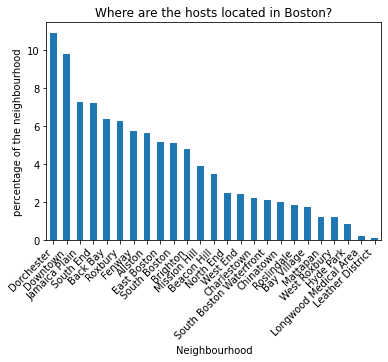

In [60]:
#plt.figure(figsize = (10,10))
host_loc = boston_listing.neighbourhood_cleansed.value_counts()

(host_loc*100/boston_listing.neighbourhood_cleansed.value_counts().dropna().sum()).plot(kind="bar");
plt.ylabel('percentage of the neighbourhood')
plt.xlabel( "Neighbourhood")
plt.title("Where are the hosts located in Boston?");
plt.xticks(rotation=45, ha='right');
plt.savefig('most_host.png')

As we can see from above graph the more than 50% of the hosing is located in **Dorchester, Downtown, Jamaica Plain, South End, Back Bay, and Roxbury**

## So what is the recomended neighbourhood?

We can check the rating of these neighbourhoods and find out which neighbourhood has ratings more than 80 out of 100 and we can filter out places with less than 70/100 rating.

In [25]:
above_80 = boston_listing[boston_listing['review_scores_rating'] > 80.0]

In [26]:
below_70 = boston_listing[boston_listing['review_scores_rating'] < 70.0]

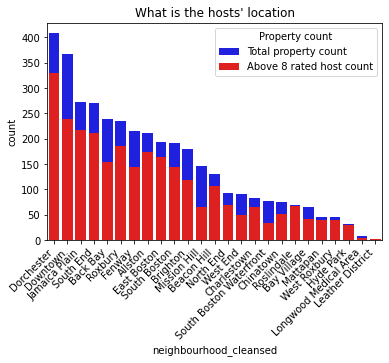

In [27]:
_, ax = plt.subplots()
sns.countplot(x='neighbourhood_cleansed',ax = ax,color = 'blue' ,data=boston_listing,order = boston_listing['neighbourhood_cleansed'].value_counts().index);
sns.countplot(x='neighbourhood_cleansed', ax = ax, color = 'red', data=above_80,order = boston_listing['neighbourhood_cleansed'].value_counts().index);
plt.xticks(rotation=45, ha='right');
ax.legend(title='Property count', loc='upper right', labels=['Total property count', 'Above 8 rated host count']);
plt.title("What is the hosts' location");

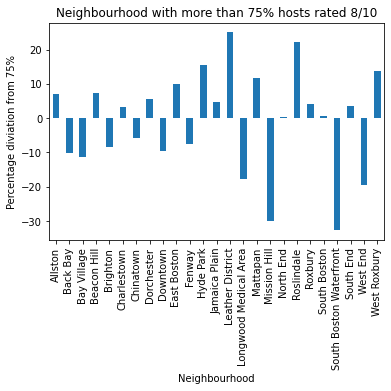

In [61]:
host_loc80 = above_80.neighbourhood_cleansed.value_counts()
(host_loc80*100/host_loc - 75).dropna().plot(kind="bar");
plt.ylabel('Percentage diviation from 75%')
plt.xlabel('Neighbourhood')
plt.title("Neighbourhood with more than 75% hosts rated 8/10");
plt.savefig('recomended_palce.png')

If 75% of the hosts in each neighbourhood are rated more than 8, that neighbourhood can be rocommended. So the recomended properties are **Allston, Beacon Hill, Charlestown, Dorchester, East Boston, Hyde Park, Jamaica Plain, Leather District, Mattapan, North End, Roslindale, Roxbury, South Boston, South End, West Roxbury** <br>
If you prefer poplular neighbourhood, **Jamaica Plain, Dorchester, Roxbury, and South End** is recomended. <br>
In terms of rating, most places in **Hyde Park, Leather District, Mattapan,Roslindale, West Roxbury** are highly rated, but further research is needed since these palecs have leeser number of hosts.

From the graph below We can see that **Downtown and Misson Hill** have the most number of hosts' with less than 7 rating. So these places should be avoided.

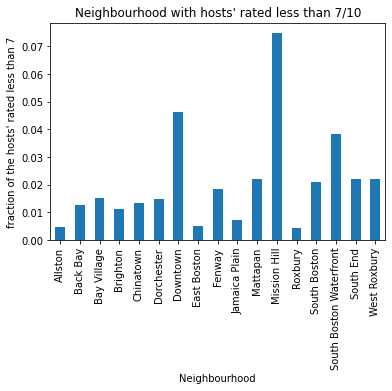

In [29]:

host_loc70 = below_70.neighbourhood_cleansed.value_counts()
(host_loc70/host_loc).dropna().plot(kind="bar");
plt.ylabel('fraction of the hosts\' rated less than 7')
plt.xlabel('Neighbourhood')
plt.title("Neighbourhood with hosts' rated less than 7/10");
plt.savefig('avoid.png')

Property type vs Price

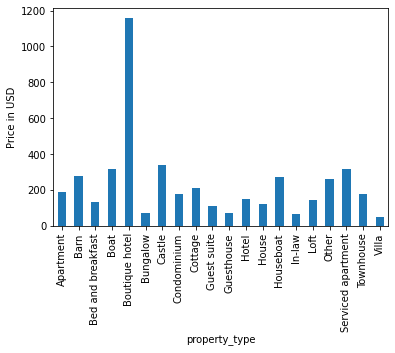

In [30]:
(boston_listing.groupby(["property_type"]).price.mean()).dropna().plot(kind='bar');
plt.ylabel('Price in USD');
plt.savefig('recomended_housing.png')

From the graph above we see that **Bunglow, Guesthouse, In-law, Villa** are among the cheaper options to stay in Boston (Costs $150 or less).

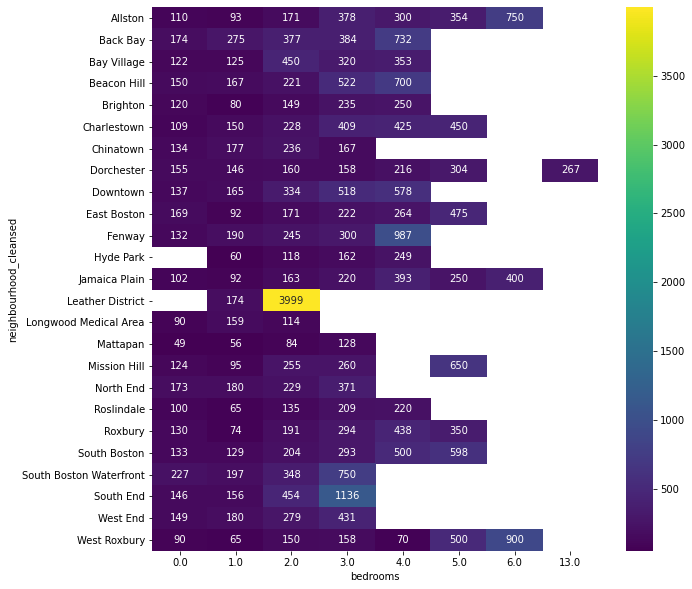

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(above_80.groupby(["neighbourhood_cleansed",'bedrooms']).price.mean().unstack(),fmt = '.0f',annot = True,cmap = 'viridis');

## where are most of the hosts located in seattle?

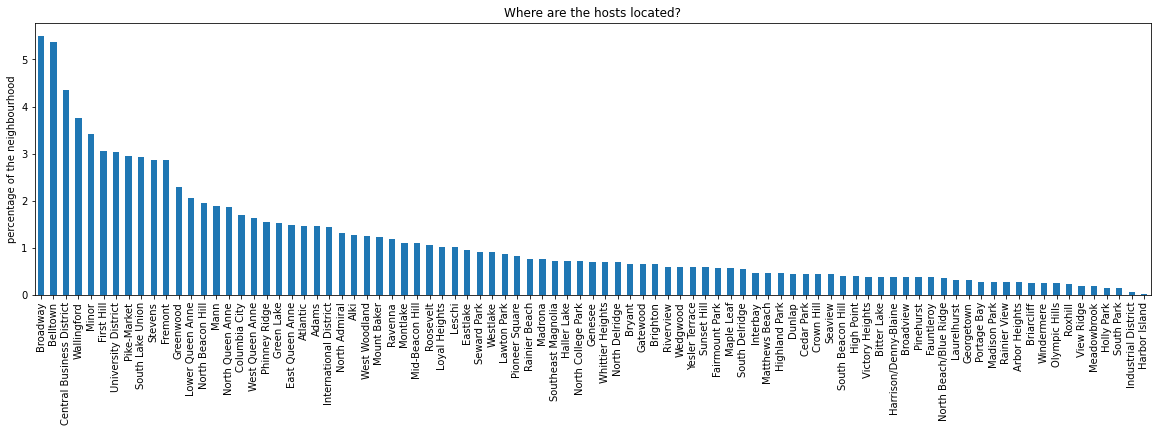

In [32]:
plt.figure(figsize=(20,5))

seattle_host_loc = seattle_listing.neighbourhood_cleansed.value_counts().dropna()

(seattle_host_loc*100/seattle_listing.neighbourhood_cleansed.value_counts().dropna().sum()).plot(kind="bar");
plt.ylabel('percentage of the neighbourhood')
plt.title("Where are the hosts located?");

In [33]:
seattle_host_loc[:16].sum()/seattle_listing.neighbourhood_cleansed.value_counts().dropna().sum()

0.5010801880798068

First 15 neighbourhoods has 50% of the hosts

As we can see from above graph top 50% neighbourhoods are located in **Broadway, Belltown, Central Business District, Wallingford, and Minor,First Hill, Univeristy District, Pike-Market, ..**

## So what is the recomended neighbourhood?

In [44]:
seattle_above_80 = seattle_listing[seattle_listing['review_scores_rating'] > 80.0]
seattle_below_70 = seattle_listing[seattle_listing['review_scores_rating'] < 70.0]

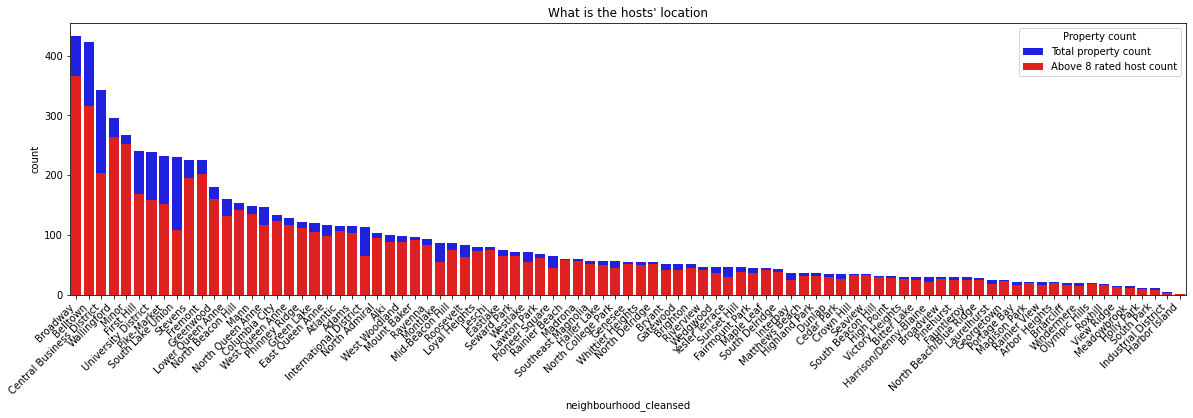

In [46]:
_, ax = plt.subplots(figsize=(20,5))
sns.countplot(x='neighbourhood_cleansed',ax = ax,color = 'blue' ,data=seattle_listing,order = seattle_listing['neighbourhood_cleansed'].value_counts().index);
sns.countplot(x='neighbourhood_cleansed', ax = ax, color = 'red', data=seattle_above_80,order = seattle_listing['neighbourhood_cleansed'].value_counts().index);
plt.xticks(rotation=45, ha='right');
ax.legend(title='Property count', loc='upper right', labels=['Total property count', 'Above 8 rated host count']);
plt.title("What is the hosts' location");

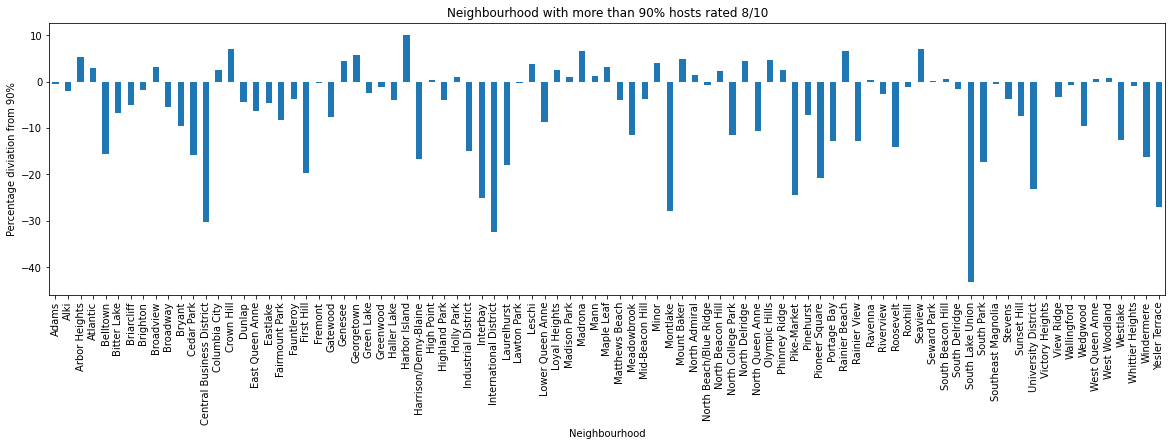

In [48]:
plt.figure(figsize=(20,5))
seattle_host_loc80 = seattle_above_80.neighbourhood_cleansed.value_counts().dropna()
(seattle_host_loc80*100/seattle_host_loc - 90).dropna().plot(kind="bar");
plt.ylabel('Percentage diviation from 90%')
plt.xlabel('Neighbourhood')
plt.title("Neighbourhood with more than 90% hosts rated 8/10");

In [38]:
seattle_host_loc.index[:16]

Index(['Broadway', 'Belltown', 'Central Business District', 'Wallingford',
       'Minor', 'First Hill', 'University District', 'Pike-Market',
       'South Lake Union', 'Stevens', 'Fremont', 'Greenwood',
       'Lower Queen Anne', 'North Beacon Hill', 'Mann', 'North Queen Anne'],
      dtype='object')

We can check the rating of these neighbourhoods and find out which neighbourhood has ratings more than 80 out of 100 and we can filter out places with less than 70/100 rating.

Seattle is more spread out than Boston, and most of the neighbourhood is highly rated. <br>
If 90% of the hosts in each neighbourhood are rated more than 8, that neighbourhood can be rocomended. So the recomended properties are **Arbor Heights, Atlantic, Broadview, Columbia City, Crown Hill, Fremont,Genesee,Georgetown, Harbor Island,Leschi,Loyal Heights,Madison Park,Madrona,Mann,Maple Leaf,Mount Baker,North Admiral,North Beacon Hill,North Delridge,Olympic Hills, Phinney Ridge,Rainier Beach,Ravenna, Seaview, Seward Park,South Beacon Hill,Victory Heights, West Queen Anne, and West Woodland** <br>
If you prefer poplular neighbourhood, **Fremont, North Beacon Hill, and Mann** is recomended. <br>
In terms of rating, most places in **Arbor Heights,Crown Hill,Georgetown,Harbor Island,Madrona,Rainier Beach,Seaview** are highly rated, but further research is needed since these palecs have leeser number of hosts.

From the graph below We can see that **International District,Montlake, South Park, and View Ridge** have the most number of hosts with less than 7 rating. So these places should be avoided.

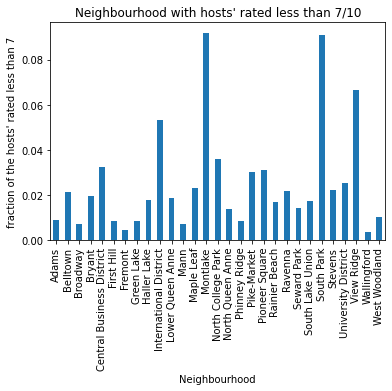

In [49]:
seattle_host_loc70 = seattle_below_70.neighbourhood_cleansed.value_counts()
(seattle_host_loc70/seattle_host_loc).dropna().plot(kind="bar");
plt.ylabel('fraction of the hosts\' rated less than 7')
plt.xlabel('Neighbourhood')
plt.title("Neighbourhood with hosts' rated less than 7/10");

Property_type vs Price

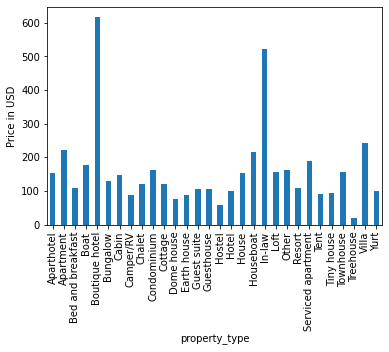

In [50]:
(seattle_listing.groupby(["property_type"]).price.mean()).dropna().plot(kind='bar');
plt.ylabel('Price in USD');

From the graph above we see that **Camper/RV, Dome house, Hostel, and Treehouse** are among the cheaper options to stay in Seattle (Costs less than $100). 

More than 95% housing reted 8/10

In [53]:
[(seattle_host_loc80*100/seattle_host_loc - 95).index[i] for i, value in enumerate(seattle_host_loc80*100/seattle_host_loc - 95) if value > 0]

['Arbor Heights',
 'Crown Hill',
 'Georgetown',
 'Harbor Island',
 'Madrona',
 'Rainier Beach',
 'Seaview']